# Data Analysis

In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_titanic_dataframe = pd.read_csv('train.csv')
test_titanic_dataframe = pd.read_csv('test.csv')

In [3]:
train_titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_titanic_dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_titanic_dataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

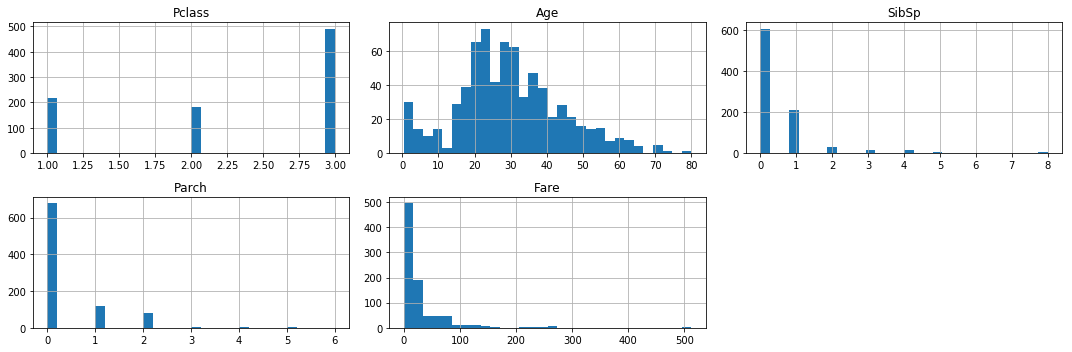

In [6]:
%matplotlib inline

default_no_bins = 30

plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1)
plt.title('Pclass')
train_titanic_dataframe['Pclass'].hist(bins=default_no_bins)
plt.subplot(2, 3, 2)
plt.title('Age')
train_titanic_dataframe['Age'].hist(bins=default_no_bins)
plt.subplot(2, 3, 3)
plt.title('SibSp')
train_titanic_dataframe['SibSp'].hist(bins=default_no_bins)
plt.subplot(2, 3, 4)
plt.title('Parch')
train_titanic_dataframe['Parch'].hist(bins=default_no_bins)
plt.subplot(2, 3, 5)
plt.title('Fare')
train_titanic_dataframe['Fare'].hist(bins=default_no_bins)
plt.tight_layout()

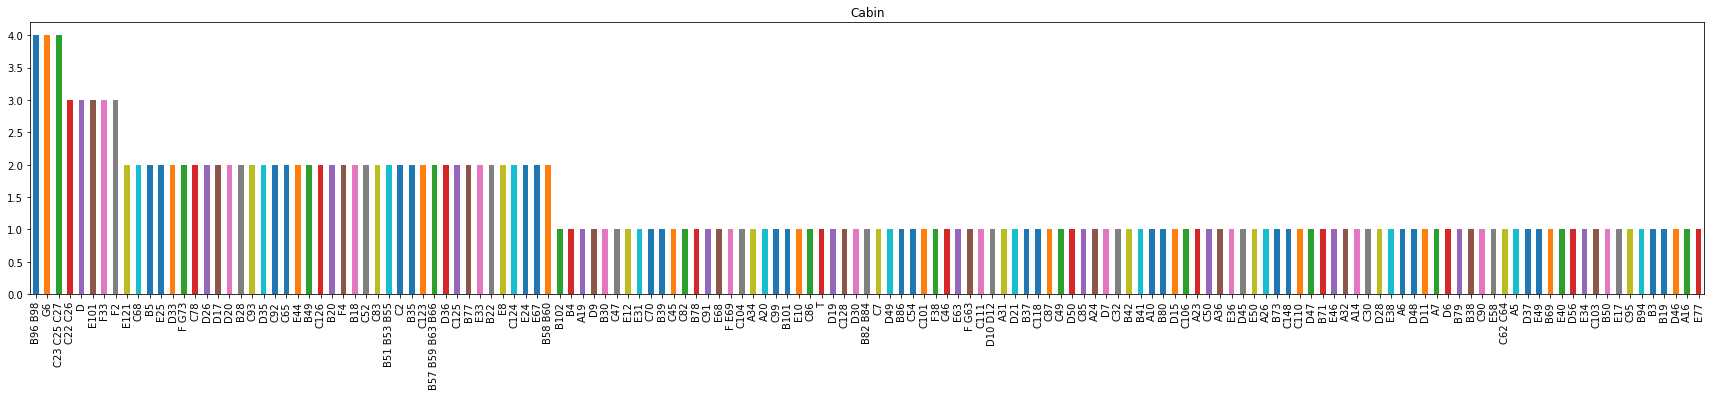

In [7]:
%matplotlib inline

plt.figure(figsize=(30, 5))
plt.title('Cabin')
train_titanic_dataframe['Cabin'].value_counts().plot(kind='bar')

In [8]:
test_titanic_dataframe.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test_titanic_dataframe.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


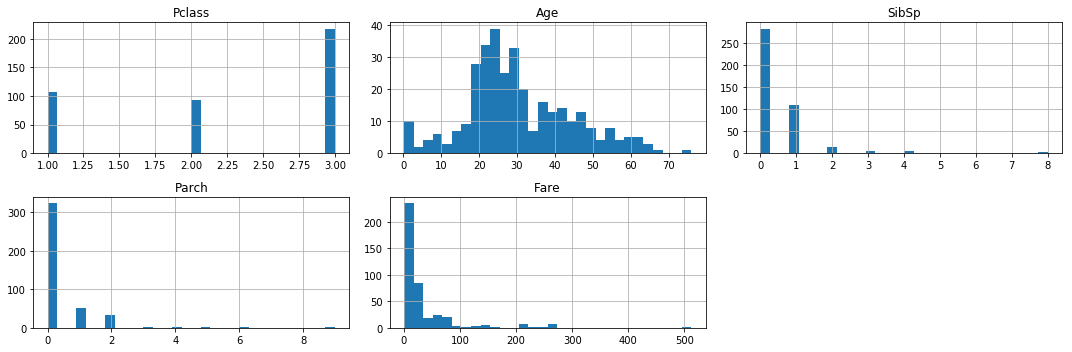

In [10]:
%matplotlib inline

default_no_bins = 30

plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1)
plt.title('Pclass')
test_titanic_dataframe['Pclass'].hist(bins=default_no_bins)
plt.subplot(2, 3, 2)
plt.title('Age')
test_titanic_dataframe['Age'].hist(bins=default_no_bins)
plt.subplot(2, 3, 3)
plt.title('SibSp')
test_titanic_dataframe['SibSp'].hist(bins=default_no_bins)
plt.subplot(2, 3, 4)
plt.title('Parch')
test_titanic_dataframe['Parch'].hist(bins=default_no_bins)
plt.subplot(2, 3, 5)
plt.title('Fare')
test_titanic_dataframe['Fare'].hist(bins=default_no_bins)
plt.tight_layout()

# Data Preprocessing

In [11]:
from sklearn import preprocessing

In [12]:
def preprocess_data(titanic_dataframe):
    new_dataframe = pd.DataFrame()
    new_dataframe['PassengerId'] = titanic_dataframe['PassengerId']
    
    new_dataframe['pclass_1'] = titanic_dataframe['Pclass'].apply(lambda val: 1.0 if val == 1 else 0.0)
    new_dataframe['pclass_2'] = titanic_dataframe['Pclass'].apply(lambda val: 1.0 if val == 2 else 0.0)
    new_dataframe['pclass_3'] = titanic_dataframe['Pclass'].apply(lambda val: 1.0 if val == 3 else 0.0)
    
    new_dataframe['sex_male'] = titanic_dataframe['Sex'].apply(lambda val: 1.0 if val == 'male' else 0.0)
    new_dataframe['sex_female'] = titanic_dataframe['Sex'].apply(lambda val: 1.0 if val == 'female' else 0.0)
    
    median_age = titanic_dataframe['Age'].median()
    new_dataframe['Age'] = titanic_dataframe['Age'].apply(lambda val: val if pd.isna(val) is False else median_age)
    
    new_dataframe['SibSp'] = titanic_dataframe['SibSp'].apply(lambda val: val if pd.isna(val) is False else 0)
    
    new_dataframe['Parch'] = titanic_dataframeq['Parch'].apply(lambda val: val if pd.isna(val) is False else 0)
    
    median_fare = titanic_dataframe['Fare'].median()
    new_dataframe['Fare'] = titanic_dataframe['Fare'].apply(lambda val: val if pd.isna(val) is False else median_fare)
    
    new_dataframe['cabin_valid'] = titanic_dataframe['Cabin'].apply(lambda val: 1.0 if type(val) == str else 0.0)
    CABIN_SECTIONS = ['A','B','C','D','E','F','G','T']
    for cabin_section in CABIN_SECTIONS:
        new_dataframe['cabin_section_%s' % cabin_section] = titanic_dataframe['Cabin'].apply(lambda val: 1.0 if type(val) == str and val.split(' ')[0][0].lower() == cabin_section.lower() else 0.0)
    new_dataframe['cabin_number'] = titanic_dataframe['Cabin'].apply(lambda val: int(val.split(' ')[0][1:]) if type(val) == str and val.split(' ')[0][1:] != '' else 0)
    
    new_dataframe['embark_c'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if type(val) == str and val.lower() == 'c' else 0.0)
    new_dataframe['embark_s'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if type(val) == str and val.lower() == 's' else 0.0)
    new_dataframe['embark_q'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if type(val) == str and val.lower() == 'q' else 0.0)
    new_dataframe['embark_valid'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if type(val) == str and (val.lower() == 'c' or val.lower() == 's' or val.lower() == 'q') else 0.0)
    
    return new_dataframe

def preprocess_target(titanic_dataframe):
    new_dataframe = pd.DataFrame()
    new_dataframe['Survived'] = titanic_dataframe['Survived']
    
    return new_dataframe

In [13]:
train_titanic_dataframe_reindexed = train_titanic_dataframe.reindex(np.random.permutation(train_titanic_dataframe.index))

train_titanic_dataframe_data_prep = preprocess_data(train_titanic_dataframe_reindexed)
train_titanic_dataframe_target_prep = preprocess_target(train_titanic_dataframe_reindexed)
train_titanic_dataframe_data_prep.head()

,PassengerId,pclass_1,pclass_2,pclass_3,sex_male,sex_female,Age,SibSp,Parch,Fare,...,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,cabin_number,embark_c,embark_s,embark_q,embark_valid
172,173,0.0,0.0,1.0,0.0,1.0,1.0,1,1,11.1333,...,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,1.0
204,205,0.0,0.0,1.0,1.0,0.0,18.0,0,0,8.0500,...,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,1.0
639,640,0.0,0.0,1.0,1.0,0.0,28.0,1,0,16.1000,...,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,1.0
140,141,0.0,0.0,1.0,0.0,1.0,28.0,0,2,15.2458,...,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,1.0
74,75,0.0,0.0,1.0,1.0,0.0,32.0,0,0,56.4958,...,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,1.0


In [14]:
train_titanic_dataframe_data_prep.describe()

,PassengerId,pclass_1,pclass_2,pclass_3,sex_male,sex_female,Age,SibSp,Parch,Fare,...,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,cabin_number,embark_c,embark_s,embark_q,embark_valid
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.242424,0.206510,0.551066,0.647587,0.352413,29.361582,0.523008,0.381594,32.204208,...,0.037037,0.035915,0.014590,0.004489,0.001122,11.021324,0.188552,0.722783,0.086420,0.997755
std,257.353842,0.428790,0.405028,0.497665,0.477990,0.477990,13.019697,1.102743,0.806057,49.693429,...,0.188959,0.186182,0.119973,0.066890,0.033501,26.638204,0.391372,0.447876,0.281141,0.047351
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,0.000000,0.000000,14.454200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,668.500000,0.000000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,...,1.000000,1.000000,1.000000,1.000000,1.000000,148.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
training_data = train_titanic_dataframe_data_prep.head(700)
training_targets = train_titanic_dataframe_target_prep.head(700)
training_targets_one_hot = preprocessing.OneHotEncoder().fit_transform(training_targets).toarray()
training_data.describe()

,PassengerId,pclass_1,pclass_2,pclass_3,sex_male,sex_female,Age,SibSp,Parch,Fare,...,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,cabin_number,embark_c,embark_s,embark_q,embark_valid
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,440.240000,0.241429,0.211429,0.547143,0.655714,0.344286,29.936071,0.492857,0.350000,31.666987,...,0.040000,0.031429,0.014286,0.005714,0.001429,10.971429,0.187143,0.727143,0.084286,0.998571
std,255.116955,0.428256,0.408614,0.498129,0.475475,0.475475,13.185492,1.065095,0.742391,51.096456,...,0.196099,0.174598,0.118751,0.075431,0.037796,26.898405,0.390305,0.445747,0.278014,0.037796
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.670000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,220.750000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,441.500000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,0.000000,0.000000,14.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,660.250000,0.000000,0.000000,1.000000,1.000000,1.000000,36.000000,1.000000,0.000000,30.070800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,8.000000,5.000000,512.329200,...,1.000000,1.000000,1.000000,1.000000,1.000000,148.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
validation_data = train_titanic_dataframe_data_prep.tail(200)
validation_targets = train_titanic_dataframe_target_prep.tail(200)
validation_targets_one_hot = preprocessing.OneHotEncoder().fit_transform(validation_targets).toarray()
validation_data.describe()

,PassengerId,pclass_1,pclass_2,pclass_3,sex_male,sex_female,Age,SibSp,Parch,Fare,...,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,cabin_number,embark_c,embark_s,embark_q,embark_valid
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.0,200.0,200.000000,200.000000,200.000000,200.0000,200.000000
mean,464.110000,0.245000,0.185000,0.570000,0.615000,0.385000,27.274600,0.650000,0.500000,33.774814,...,0.030000,0.055000,0.015000,0.0,0.0,11.700000,0.185000,0.720000,0.0900,0.995000
std,266.718337,0.431166,0.389272,0.496318,0.487816,0.487816,12.005373,1.313823,0.992434,43.510406,...,0.171015,0.228552,0.121857,0.0,0.0,26.286019,0.389272,0.450126,0.2869,0.070711
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0000,0.000000
25%,234.750000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,7.925000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0000,1.000000
50%,459.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,0.000000,0.000000,16.100000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0000,1.000000
75%,691.250000,0.000000,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,1.000000,39.621875,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0000,1.000000
max,889.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,8.000000,6.000000,263.000000,...,1.000000,1.000000,1.000000,0.0,0.0,121.000000,1.000000,1.000000,1.0000,1.000000


# Model

In [17]:
from sklearn import linear_model, metrics, svm
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

/home/rousnake_1/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
sgd_classifier = linear_model.SGDClassifier(max_iter=1000)
sgd_classifier.fit(training_data.drop(axis=1, columns=['PassengerId']), training_targets)

/home/rousnake_1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

optimizers_list = [
    optimizers.Adam(),
    optimizers.SGD(momentum=1.0),
    optimizers.Adadelta(),
    optimizers.Adagrad(),
    optimizers.RMSprop(),
    optimizers.Adamax(),
    optimizers.Nadam(),
]

lr_list = [0.001, 0.0001, 0.00001]

batch_size_list = [100, 50, 10, 5]

for optimizer in optimizers_list:
    for lr in lr_list:
        for batch_size in batch_size_list: 
            dnn_classifier = Sequential()
            input_shape = (training_data.drop(axis=1, columns=['PassengerId']).shape[1], )
            dnn_classifier.add(Dense(1024, activation='relu', input_shape=input_shape))
            dnn_classifier.add(Dense(256, activation='relu'))
            dnn_classifier.add(Dense(64, activation='relu'))
            dnn_classifier.add(Dense(2, activation='softmax'))
            optimizer.lr = lr
            dnn_classifier.compile(loss='binary_crossentropy', 
                                   optimizer=optimizer,
                                   metrics=['accuracy'])
            history = dnn_classifier.fit(training_data.drop(axis=1, columns=['PassengerId']), training_targets_one_hot,
                              epochs=100, batch_size=batch_size, verbose=0, shuffle=True,
                              validation_data=(validation_data.drop(axis=1, columns=['PassengerId']), validation_targets_one_hot))

            print('Optimizer: %s; LR: %f; bs: %d; acc: %s; val_acc: %s' % (type(optimizer).__name__, lr, batch_size, history.history['acc'][-1], history.history['val_acc'][-1]))

In [33]:
dnn_classifier = Sequential()
input_shape = (training_data.drop(axis=1, columns=['PassengerId']).shape[1], )
dnn_classifier.add(Dense(1024, activation='relu', input_shape=input_shape))
dnn_classifier.add(Dense(256, activation='relu'))
dnn_classifier.add(Dense(64, activation='relu'))
dnn_classifier.add(Dense(2, activation='softmax'))
dnn_classifier.compile(loss='binary_crossentropy', 
                       optimizer=optimizers.Adamax(lr=0.0001),
                       metrics=['accuracy'])
history = dnn_classifier.fit(training_data.drop(axis=1, columns=['PassengerId']), training_targets_one_hot,
                  epochs=100, batch_size=10, verbose=1, shuffle=True,
                  validation_data=(validation_data.drop(axis=1, columns=['PassengerId']), validation_targets_one_hot))

Train on 700 samples, validate on 200 samples
Epoch 1/100
700/700 [==============================] - 1s 1ms/step - loss: 0.7106 - acc: 0.6657 - val_loss: 0.5686 - val_acc: 0.7050
Epoch 2/100
700/700 [==============================] - 1s 887us/step - loss: 0.6155 - acc: 0.6886 - val_loss: 0.5696 - val_acc: 0.7000
Epoch 3/100
700/700 [==============================] - 1s 876us/step - loss: 0.6038 - acc: 0.6786 - val_loss: 0.5576 - val_acc: 0.7500
Epoch 4/100
700/700 [==============================] - 1s 871us/step - loss: 0.5790 - acc: 0.7029 - val_loss: 0.5508 - val_acc: 0.7400
Epoch 5/100
700/700 [==============================] - 1s 907us/step - loss: 0.5654 - acc: 0.7214 - val_loss: 0.5487 - val_acc: 0.7550
Epoch 6/100
700/700 [==============================] - 1s 868us/step - loss: 0.5581 - acc: 0.7243 - val_loss: 0.5337 - val_acc: 0.7350
Epoch 7/100
700/700 [==============================] - 1s 935us/step - loss: 0.5531 - acc: 0.7414 - val_loss: 0.5185 - val_acc: 0.7400
Epoch 8/100

700/700 [==============================] - 1s 1ms/step - loss: 0.4151 - acc: 0.8243 - val_loss: 0.4269 - val_acc: 0.8100
Epoch 62/100
700/700 [==============================] - 1s 925us/step - loss: 0.4213 - acc: 0.8186 - val_loss: 0.4190 - val_acc: 0.8100
Epoch 63/100
700/700 [==============================] - 1s 987us/step - loss: 0.4265 - acc: 0.8143 - val_loss: 0.3913 - val_acc: 0.8300
Epoch 64/100
700/700 [==============================] - 1s 858us/step - loss: 0.4137 - acc: 0.8243 - val_loss: 0.4203 - val_acc: 0.8300
Epoch 65/100
700/700 [==============================] - 1s 869us/step - loss: 0.4159 - acc: 0.8200 - val_loss: 0.3922 - val_acc: 0.8250
Epoch 66/100
700/700 [==============================] - 1s 864us/step - loss: 0.4220 - acc: 0.8143 - val_loss: 0.3866 - val_acc: 0.8500
Epoch 67/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4206 - acc: 0.8243 - val_loss: 0.3996 - val_acc: 0.8350
Epoch 68/100
700/700 [==============================] - 1s 978us/

In [19]:
logistic_regression = linear_model.LogisticRegression()
logistic_regression.fit(training_data.drop(axis=1, columns=['PassengerId']), training_targets)

/home/rousnake_1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
svm_classifier = svm.SVC(kernel='rbf')
svm_classifier.fit(training_data.drop(axis=1, columns=['PassengerId']), training_targets)

/home/rousnake_1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
classifier = logistic_regression

training_prediction = classifier.predict(training_data.drop(axis=1, columns=['PassengerId']))
if type(classifier) == Sequential:
    training_prediction = pd.DataFrame(training_prediction).apply(lambda val: 1.0 if val[1] > val[0] else 0.0, axis=1)

validation_prediction = classifier.predict(validation_data.drop(axis=1, columns=['PassengerId']))
if type(classifier) == Sequential:
    validation_prediction = pd.DataFrame(validation_prediction).apply(lambda val: 1.0 if val[1] > val[0] else 0.0, axis=1)

print('Root Mean Square (training data)    : %f' % math.sqrt(metrics.mean_squared_error(training_targets, training_prediction)))
print('AUC score (training data)           : %f' % metrics.roc_auc_score(training_targets, training_prediction))
print('Accuracy score (training data)      : %f' % metrics.accuracy_score(training_targets, training_prediction))
print('')
print('Root Mean Square (validation data)  : %f' % math.sqrt(metrics.mean_squared_error(validation_targets, validation_prediction)))
print('AUC score (validation data)         : %f' % metrics.roc_auc_score(validation_targets, validation_prediction))
print('Accuracy score (validation data)    : %f' % metrics.accuracy_score(validation_targets, validation_prediction))

Root Mean Square (training data)    : 0.445614
AUC score (training data)           : 0.786693
Accuracy score (training data)      : 0.801429

Root Mean Square (validation data)  : 0.430116
AUC score (validation data)         : 0.808310
Accuracy score (validation data)    : 0.815000


# Predict Test

In [34]:
final_classifier = dnn_classifier

training = train_titanic_dataframe_data_prep
targets = train_titanic_dataframe_target_prep
targets_one_hot = preprocessing.OneHotEncoder().fit_transform(targets).toarray()
final_classifier.fit(training.drop(axis=1, columns=['PassengerId']), targets_one_hot,
                     epochs=100, batch_size=10)
# final_classifier.fit(training.drop(axis=1, columns=['PassengerId']), targets)

Epoch 1/100
891/891 [==============================] - 1s 880us/step - loss: 0.3941 - acc: 0.8384
Epoch 2/100
891/891 [==============================] - 1s 882us/step - loss: 0.3937 - acc: 0.8272
Epoch 3/100
891/891 [==============================] - 1s 864us/step - loss: 0.3893 - acc: 0.8418
Epoch 4/100
891/891 [==============================] - 1s 824us/step - loss: 0.3890 - acc: 0.8384
Epoch 5/100
891/891 [==============================] - 1s 830us/step - loss: 0.4017 - acc: 0.8361
Epoch 6/100
891/891 [==============================] - 1s 883us/step - loss: 0.3891 - acc: 0.8350
Epoch 7/100
891/891 [==============================] - 1s 917us/step - loss: 0.3857 - acc: 0.8395
Epoch 8/100
891/891 [==============================] - 1s 898us/step - loss: 0.3838 - acc: 0.8519
Epoch 9/100
891/891 [==============================] - 1s 865us/step - loss: 0.3900 - acc: 0.8283
Epoch 10/100
891/891 [==============================] - 1s 829us/step - loss: 0.3789 - acc: 0.8316
Epoch 11/100
891/89

891/891 [==============================] - 1s 821us/step - loss: 0.3495 - acc: 0.8597
Epoch 84/100
891/891 [==============================] - 1s 853us/step - loss: 0.3482 - acc: 0.8586
Epoch 85/100
891/891 [==============================] - 1s 877us/step - loss: 0.3513 - acc: 0.8586
Epoch 86/100
891/891 [==============================] - 1s 864us/step - loss: 0.3518 - acc: 0.8631
Epoch 87/100
891/891 [==============================] - 1s 861us/step - loss: 0.3499 - acc: 0.8608
Epoch 88/100
891/891 [==============================] - 1s 875us/step - loss: 0.3501 - acc: 0.8541
Epoch 89/100
891/891 [==============================] - 1s 827us/step - loss: 0.3517 - acc: 0.8586
Epoch 90/100
891/891 [==============================] - 1s 854us/step - loss: 0.3511 - acc: 0.8608
Epoch 91/100
891/891 [==============================] - 1s 857us/step - loss: 0.3529 - acc: 0.8519
Epoch 92/100
891/891 [==============================] - 1s 834us/step - loss: 0.3515 - acc: 0.8608
Epoch 93/100
891/891 [=

In [35]:
test_titanic_dataframe_data_prep = preprocess_data(test_titanic_dataframe)

In [36]:
test_predictions = final_classifier.predict(test_titanic_dataframe_data_prep.drop(axis=1, columns=['PassengerId']))
if type(final_classifier) == Sequential:
    test_predictions = pd.DataFrame(test_predictions).apply(lambda val: 1.0 if val[1] > val[0] else 0.0, axis=1)

In [37]:
import csv

with open('submission.csv', 'w') as submission_file:
    writer = csv.writer(submission_file)
    writer.writerow(['PassengerId', 'Survived'])
    for index, passengerId in enumerate(test_titanic_dataframe['PassengerId']):
        writer.writerow([passengerId, int(test_predictions[index])])